<a href="https://colab.research.google.com/github/HPNChanel/Colab-Machine-Learning-Model/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng Iris Dataset - một bộ dữ liệu phổ biến trong học máy sử dụng KNN (K-Nearest Neighbors)

**1. Chuẩn bị môi trường**

In [ ]:
!pip install numpy pandas matplotlib scikit-learn

**2. Tải dữ liệu**
Load dữ liệu có sẵn trong thư viện Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load Iris Data
iris = load_iris()

# Chuyển dữ liệu thành DataFrame để dễ quan sát
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Hiển thị 5 dòng dữ liệu đầu tiên
print(iris_df.head())

# Mô tả các thông tin thống kê cơ bản
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

Với:

*   load_iris(): tải dữ liệu Iris, chứa các thông tin về hoa như chiều dài và chiều rộng của cánh hoa
*   DataFrame: Chuyển dữ liệu thành bảng để dễ đọc và thao tác
*   head() và describe(): hiển thị mẫu dữ liệu và mô tả thống kê



**3. Chia dữ liệu và chuẩn hóa**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chia dữ liệu thành X (features) và y (target)
X = iris.data  # Các đặc trưng
y = iris.target  # Nhãn (các loại hoa)

# Chia dữ liệu thành tập huấn luyện (70%) và kiểm tra (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# In kích thước dữ liệu sau khi chia
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

Training data size: (105, 4)
Test data size: (45, 4)


train_test_split: chia dữ liệu thành 2 phần: 70% để huấn luyện, 30% để kiểm tra
StandardScaler: chuẩn hóa dữ liệu để đưa tất cả về cùng một thang đo, giúp KNN hoạt động hiệu quả hơn

**4. Huấn luyện mô hình KNN**

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình với k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình với dữ liệu huấn luyện
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)  # Sử dụng hàm predict

# In ra màn hình kết quả dự đoán
print(f"Predictions: {y_pred}")

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


*   KNeighborsClassifier: khởi tạo thuật toán KNN. Tham số n_neighbors = 3 nghĩa là xét 3 neighbors gần nhất
*   fit: huấn luyện mô hình dựa trên tập huấn luyện
*   predict: dự đoán nhãn của tập kiểm tra





5. Đánh giá mô hình

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Đánh giá hiệu suất
print("Confusion Matrix:")  # Ma trận nhầm lẫn
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")  # Báo cáo phân loại
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")  # Độ chính xác
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score:
1.0


*   confusion_matrix: ma trận nhầm lẫn, cho biết số lần dự đoán đúng và sai với từng lớp
*   classification_report: báo cáo chi tiết gồm precision, recall, và F1-score cho từng lớp
*   accuracy_score: tính độ chính xác tổng quát của mô hình



6. Hiển thị dữ liệu

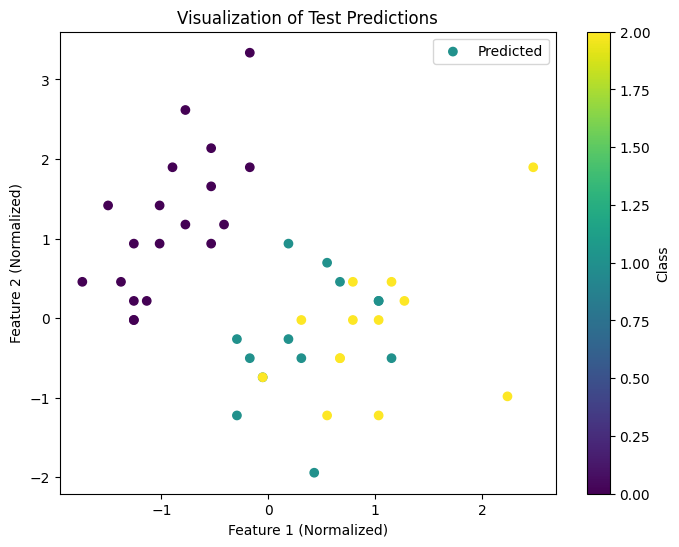

In [6]:
# Vẽ biểu đồ minh họa(ví dụ cho 2 đặc trưng đầu tiên của dữ liệu)

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', label='Predicted')
plt.title("Visualization of Test Predictions")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.colorbar(label='Class')
plt.legend()
plt.show()